In [38]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
import tensorflow as tf

In [39]:
df = pd.read_csv("./stockPrice.csv", header=0, na_values='.');
df.head()

,date,open,high,low,close,vol,sma10,sma20,sma50,sma100,vwap,bbmid,bbUpper,bbLower,cci,roc,rsi
0,Mon Apr 06 2009 02:00:00 GMT+0200 (GMT+02:00),168.50,170.50,166.00,167.25,6202062,167.2500,167.2500,167.2500,167.2500,167.916667,167.2500,167.250000,167.250000,0.000000,NaN,58.528428
1,Tue Apr 07 2009 02:00:00 GMT+0200 (GMT+02:00),167.50,169.25,165.25,166.50,7355104,166.8750,166.8750,166.8750,166.8750,167.419352,166.8750,167.625000,166.125000,-66.666667,NaN,57.333669
2,Wed Apr 08 2009 02:00:00 GMT+0200 (GMT+02:00),164.50,169.50,164.25,169.50,5001402,167.7500,167.7500,167.7500,167.7500,167.508459,167.7500,170.299510,165.200490,35.000000,NaN,60.782252
3,Thu Apr 09 2009 02:00:00 GMT+0200 (GMT+02:00),170.00,170.50,168.00,170.50,1924916,168.4375,168.4375,168.4375,168.4375,167.711275,168.4375,171.685095,165.189905,133.333333,NaN,61.888061
4,Tue Apr 14 2009 02:00:00 GMT+0200 (GMT+02:00),172.25,175.75,170.75,173.75,8406764,169.5000,169.5000,169.5000,169.5000,169.371485,169.5000,174.647815,164.352185,148.664344,NaN,65.311415


In [40]:
lol = df.copy()
lol["1pred"] = (df["close"].shift(-1) - df["close"]) / df["close"]
lol["3pred"] = (df["close"].shift(-3) - df["close"]) / df["close"]
lol["5pred"] = (df["close"].shift(-5) - df["close"]) / df["close"]
lol["10pred"] = (df["close"].shift(-10) - df["close"]) / df["close"]

# lol["1predB"] = (df["close"].shift(-1) > df["close"])
# lol["3predB"] = (df["close"].shift(-3) > df["close"])
# lol["5predB"] = (df["close"].shift(-5) > df["close"])
# lol["10predB"] = (df["close"].shift(-10) > df["close"])

lol.loc[df["close"].shift(-1) > df["close"] , '1predB'] = 0
lol.loc[df["close"].shift(-1) < df["close"] , '1predB'] = 1
lol.loc[df["close"].shift(-1) > df["close"] , '3predB'] = 0
lol.loc[df["close"].shift(-1) < df["close"] , '3predB'] = 1
lol.loc[df["close"].shift(-1) > df["close"] , '5predB'] = 0
lol.loc[df["close"].shift(-1) < df["close"] , '5predB'] = 1
lol.loc[df["close"].shift(-1) > df["close"] , '10predB'] = 0
lol.loc[df["close"].shift(-1) < df["close"] , '10predB'] = 1

lol["5max"] = lol["close"].rolling(window=5).max()
lol["10max"] = lol["close"].rolling(window=10).max()
lol["20max"] = lol["close"].rolling(window=20).max()

lol["5low"] = lol["close"].rolling(window=5).min()
lol["10low"] = lol["close"].rolling(window=10).min()
lol["20low"] = lol["close"].rolling(window=20).min()

lol["vol%"] =  (df["vol"] - df["vol"].shift(1)) /df["vol"].shift(1)

lol = lol.dropna()
lol.head()

,date,open,high,low,close,vol,sma10,sma20,sma50,sma100,...,3predB,5predB,10predB,5max,10max,20max,5low,10low,20low,vol%
19,Wed May 06 2009 02:00:00 GMT+0200 (GMT+02:00),182.75,187.75,181.00,186.50,7886450,180.000,174.3625,174.362500,174.362500,...,1.0,1.0,1.0,187.00,187.00,187.00,180.50,171.75,164.5,-0.595854
20,Thu May 07 2009 02:00:00 GMT+0200 (GMT+02:00),187.50,191.00,185.25,185.50,8991542,181.375,175.2750,174.892857,174.892857,...,0.0,0.0,0.0,187.00,187.00,187.00,181.25,174.25,164.5,0.140125
21,Fri May 08 2009 02:00:00 GMT+0200 (GMT+02:00),185.50,190.50,185.50,188.25,7690750,182.775,176.3625,175.500000,175.500000,...,1.0,1.0,1.0,188.25,188.25,188.25,183.00,176.50,164.5,-0.144668
22,Mon May 11 2009 02:00:00 GMT+0200 (GMT+02:00),188.75,189.00,182.75,186.75,7042418,183.650,177.2250,175.989130,175.989130,...,1.0,1.0,1.0,188.25,188.25,188.25,183.00,176.50,164.5,-0.084300
23,Tue May 12 2009 02:00:00 GMT+0200 (GMT+02:00),185.50,188.00,183.75,183.75,6861330,183.900,177.8875,176.312500,176.312500,...,1.0,1.0,1.0,188.25,188.25,188.25,183.75,176.50,164.5,-0.025714


In [41]:
# clear = lol.copy()
dfC = pd.DataFrame()
dfC["vol"] = lol["vol%"]
dfC["sma10"] = lol["sma10"] / lol["close"]
dfC["sma20"] = lol["sma20"] / lol["close"]
dfC["sma50"] = lol["sma50"] / lol["close"]
dfC["sma100"] = lol["sma100"] / lol["close"]
dfC["vwap"] = lol["vwap"]
dfC["bbmid"] = lol["bbmid"] / lol["close"]
dfC["bbUpper"] = lol["bbUpper"] / lol["close"]
dfC["bbLower"] = lol["bbLower"] / lol["close"]
dfC["cci"] = lol["cci"] 
dfC["rsi"] = lol["rsi"] 
dfC["5max"] = lol["5max"] / lol["close"]
dfC["10max"] = lol["10max"] / lol["close"]
dfC["20max"] = lol["20max"] / lol["close"]
dfC["5low"] = lol["5low"] / lol["close"]
dfC["10low"] = lol["10low"] / lol["close"]
dfC["20low"] = lol["20low"] / lol["close"]
dfC["1pred"] = lol["1pred"]
dfC["3pred"] = lol["3pred"]
dfC["5pred"] = lol["5pred"]
dfC["10pred"] = lol["10pred"]
dfC["1predB"] = lol["1predB"]
dfC["3predB"] = lol["3predB"]
dfC["5predB"] = lol["5predB"]
dfC["10predB"] = lol["10predB"]

dfC.replace([np.inf, -np.inf], np.nan)
dfC.dropna(inplace=True)
dfC.head()

,vol,sma10,sma20,sma50,sma100,vwap,bbmid,bbUpper,bbLower,cci,...,10low,20low,1pred,3pred,5pred,10pred,1predB,3predB,5predB,10predB
19,-0.595854,0.965147,0.934920,0.934920,0.934920,174.519400,0.934920,1.007645,0.862194,130.777361,...,0.920912,0.882038,-0.005362,0.001340,-0.034853,-0.044236,1.0,1.0,1.0,1.0
20,0.140125,0.977763,0.944879,0.942819,0.942819,175.255773,0.944879,1.020220,0.869538,133.510756,...,0.939353,0.886792,0.014825,-0.009434,-0.024259,-0.052561,0.0,0.0,0.0,0.0
21,-0.144668,0.970916,0.936853,0.932271,0.932271,175.860495,0.936853,1.013623,0.860082,125.482707,...,0.937583,0.873838,-0.007968,-0.043825,-0.043825,-0.059761,1.0,1.0,1.0,1.0
22,-0.084300,0.983400,0.948996,0.942378,0.942378,176.286984,0.948996,1.028067,0.869925,96.179851,...,0.945114,0.880857,-0.016064,-0.030790,-0.017403,-0.036145,1.0,1.0,1.0,1.0
23,-0.025714,1.000816,0.968095,0.959524,0.959524,176.631119,0.968095,1.048034,0.888156,78.656463,...,0.960544,0.895238,-0.020408,-0.020408,-0.008163,-0.024490,1.0,1.0,1.0,1.0


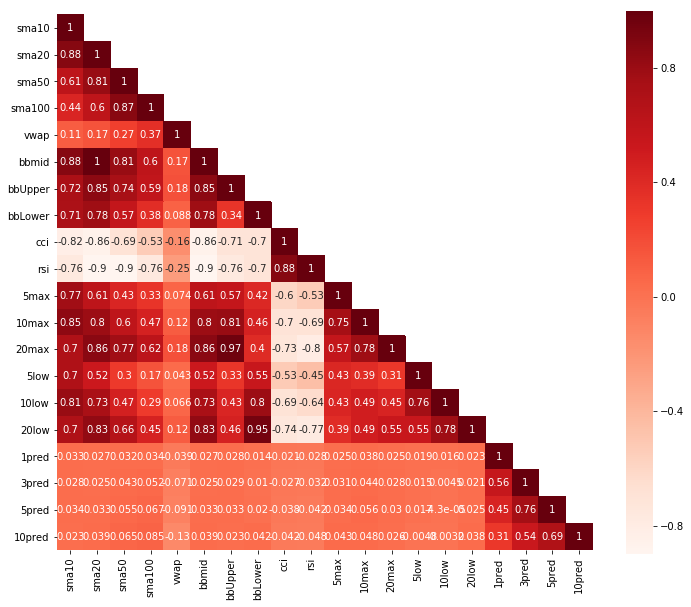

In [42]:
#corelation matrix.
corr= dfC[['sma10', 'sma20', 'sma50', 'sma100', 'vwap', 'bbmid', 'bbUpper', 'bbLower', 'cci', 'rsi', '5max', '10max', '20max', '5low', '10low', '20low', '1pred', '3pred', '5pred', '10pred']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(12,10)
sns.heatmap(data=corr,mask=mask,square=True,annot=True,cbar=True,cmap=plt.cm.Reds)

dfC.to_csv('./foo')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# clear["1pred"] = lol["1pred"]
# clear["3pred"] = lol["3pred"]
# clear["5pred"] = lol["5pred"]
# clear["10pred"] = lol["10pred"]
# clear["1predB"] = lol["1predB"]
# clear["3predB"] = lol["3predB"]
# clear["5predB"] = lol["5predB"]
# clear["10predB"] = lol["10predB"]

# clear = clear.as_matrix().astype(np.float)

# dfC.replace([np.inf, -np.inf], np.nan)


# print(dfC.shape)
# bad_indices = np.where(np.isinf(dfC))
# test[bad_indices] = np.nan
# # dfC = dfC.dropna()
# print(dfC.shape)
# print(bad_indices)


# X = dfC[['vol', 'sma10', 'sma20', 'sma50', 'sma100', 'vwap', 'bbmid', 'bbUpper', 'bbLower', 'cci', 'rsi', '5max', '10max', '20max', '5low', '10low', '20low']].astype(float)


In [44]:
from keras.models import Sequential
from keras import layers
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

def model(X_train, Y_train, X_val, Y_val):
    
    model = Sequential()
    model.add(Dense({{choice([128, 256, 512, 1024])}}, input_shape=(784,)))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense({{choice([128, 256, 512, 1024])}}))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    
    if conditional({{choice(['two', 'three'])}}) == 'three':
        model.add(Dense({{choice([128, 256, 512, 1024])}}))
        model.add(Activation({{choice(['relu', 'sigmoid'])}}))
        model.add(Dropout({{uniform(0, 1)}}))
        
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = keras.optimizers.Adam(lr={{choice([10**-3, 10**-2, 10**-1])}})
    rmsprop = keras.optimizers.RMSprop(lr={{choice([10**-3, 10**-2, 10**-1])}})
    sgd = keras.optimizers.SGD(lr={{choice([10**-3, 10**-2, 10**-1])}})
   
    choiceval = {{choice(['adam', 'sgd', 'rmsprop'])}}
    if choiceval == 'adam':
        optim = adam
    elif choiceval == 'rmsprop':
        optim = rmsprop
    else:
        optim = sgd
        
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    model.fit(X_train, Y_train,
              batch_size={{choice([128,256,512])}},
              nb_epoch=20,
              verbose=2,
              validation_data=(X_val, Y_val))
    score, acc = model.evaluate(X_val, Y_val, verbose=0)
    print('Test accuracy:', acc)
    
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

In [46]:
X = dfC[['sma10', 'sma20', 'sma50', 'sma100', 'vwap', 'bbmid', 'bbUpper', 'bbLower', 'cci', 'rsi', '5max', '10max', '20max', '5low', '10low', '20low']]
X = preprocessing.scale(X)
Y = dfC[["1predB", "3predB", "5predB", "10predB"]]


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

# best_run, best_model = optim.minimize(model=model,
#                                       data=data,
#                                       algo=tpe.suggest,
#                                       max_evals=30,
#                                       trials=Trials(),
#                                       notebook_name='price')

((1715, 16), (735, 16), (1715, 4), (735, 4))

In [ ]:
# from keras.models import Sequential
# from keras import layers
# from hyperopt import Trials, STATUS_OK, tpe
# from hyperas import optim
# from hyperas.distributions import choice, uniform

# input_dim = x_train.shape[1]  # Number of features
# output_dim = y_train.shape[1]  # Number of features

# with tf.device('/gpu:0'):
#     model = Sequential()
#     model.add(layers.Dense(input_dim * 2, input_dim=input_dim, activation='relu'))
#     model.add(layers.Dense(input_dim * 4, activation='relu'))
#     # model.add(layers.Dropout(.8))

#     model.add(layers.Dense(input_dim * 8, activation='relu'))
#     # model.add(layers.Dropout(.8))

#     model.add(layers.Dense(input_dim * 8, activation='relu'))
#     # model.add(layers.Dropout(.8))
#     model.add(layers.Dense(input_dim * 4, activation='relu'))

#     model.add(layers.Dense(input_dim * 4, activation='relu'))

#     model.add(layers.Dense(input_dim * 2, activation='relu'))

#     model.add(layers.Dense(input_dim, activation='relu'))

#     model.add(layers.Dense(output_dim, activation='linear'))




In [ ]:

# model.compile(loss='mean_squared_error', 
#                optimizer='adam', 
#                metrics=['accuracy'])
# model.summary()

In [ ]:
# from keras.callbacks import EarlyStopping
    
# es = EarlyStopping(monitor='val_loss', mode='min', patience=20)

# model_output = model.fit(x_train, y_train,
#                     epochs=1000,
# #                     verbose=10,
#                     validation_data=(x_test, y_test),
#                     batch_size=x_train.shape[1],
# #                     use_multiprocessing=True, 
# #                     workers=8,
#                     callbacks=[es])

In [ ]:
# loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))


# print('Training Accuracy : ' , np.mean(model_output.history["acc"]))
# print('Validation Accuracy : ' , np.mean(model_output.history["val_acc"]))



# # Plot training & validation accuracy values
# plt.plot(model_output.history['acc'])
# plt.plot(model_output.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# # Plot training & validation loss values
# plt.plot(model_output.history['loss'])
# plt.plot(model_output.history['val_loss'])
# plt.title('model_output loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:

# X = dfC[['sma10', 'sma20', 'sma50', 'sma100', 'vwap', 'bbmid', 'bbUpper', 'bbLower', 'cci', 'rsi', '5max', '10max', '20max', '5low', '10low', '20low']]
# X = preprocessing.scale(X)
# Y = dfC[["1predB", "3predB", "5predB", "10predB"]]


# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
# input_dim = x_train.shape[1]  # Number of features
# output_dim = y_train.shape[1]  # Number of features
# print(output_dim)
# with tf.device('/gpu:0'):
#     model = Sequential()
#     model.add(layers.Dense(input_dim * 2, input_dim=input_dim, activation='relu'))
#     model.add(layers.Dense(input_dim * 4, activation='relu'))
#     # model.add(layers.Dropout(.8))

#     model.add(layers.Dense(input_dim * 8, activation='relu'))
#     # model.add(layers.Dropout(.8))

#     model.add(layers.Dense(input_dim * 8, activation='relu'))
#     # model.add(layers.Dropout(.8))
#     model.add(layers.Dense(input_dim * 4, activation='relu'))

#     model.add(layers.Dense(input_dim * 4, activation='relu'))

#     model.add(layers.Dense(input_dim * 2, activation='relu'))

#     model.add(layers.Dense(input_dim, activation='relu'))

#     model.add(layers.Dense(output_dim, activation='softmax'))

In [ ]:
# model.compile(loss='categorical_crossentropy', 
#                optimizer='adam', 
#                metrics=['accuracy'])
# model.summary()

In [ ]:
# from keras.callbacks import EarlyStopping
    
# es2 = EarlyStopping(monitor='val_loss', mode='min', patience=30)

# model_output = model.fit(x_train, y_train,
#                     epochs=100,
# #                     verbose=10,
#                     validation_data=(x_test, y_test),
#                     batch_size=x_train.shape[1])
# #                     use_multiprocessing=True, 
# #                     workers=8,
# #                     callbacks=[es2])

In [ ]:
# from sklearn.metrics import confusion_matrix


# loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))


# print('Training Accuracy : ' , np.mean(model_output.history["acc"]))
# print('Validation Accuracy : ' , np.mean(model_output.history["val_acc"]))

# y_pred = model.predict(x_test)
# y_pred = (y_pred > 0.5) 

# print(confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1)))

    
# # Plot training & validation accuracy values
# plt.plot(model_output.history['acc'])
# plt.plot(model_output.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# # Plot training & validation loss values
# plt.plot(model_output.history['loss'])
# plt.plot(model_output.history['val_loss'])
# plt.title('model_output loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()